In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [2]:
def pair(buy_ticker, sell_ticker, long_financials, short_financials):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                 ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                 ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat(
        [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))

    spy_ticker2 = pd.concat(
        [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    # financials:
    print(long_financials)
    print(short_financials)

    return chart


Long BETA: 0.96
Short BETA: 0.77
LONG position ABR P/E ratio=6.41, dividend: 0.119, Gross profit: 615206
SHORT position AGNC P/E ratio=None, dividend: 0.186, Gross Profit: 837000


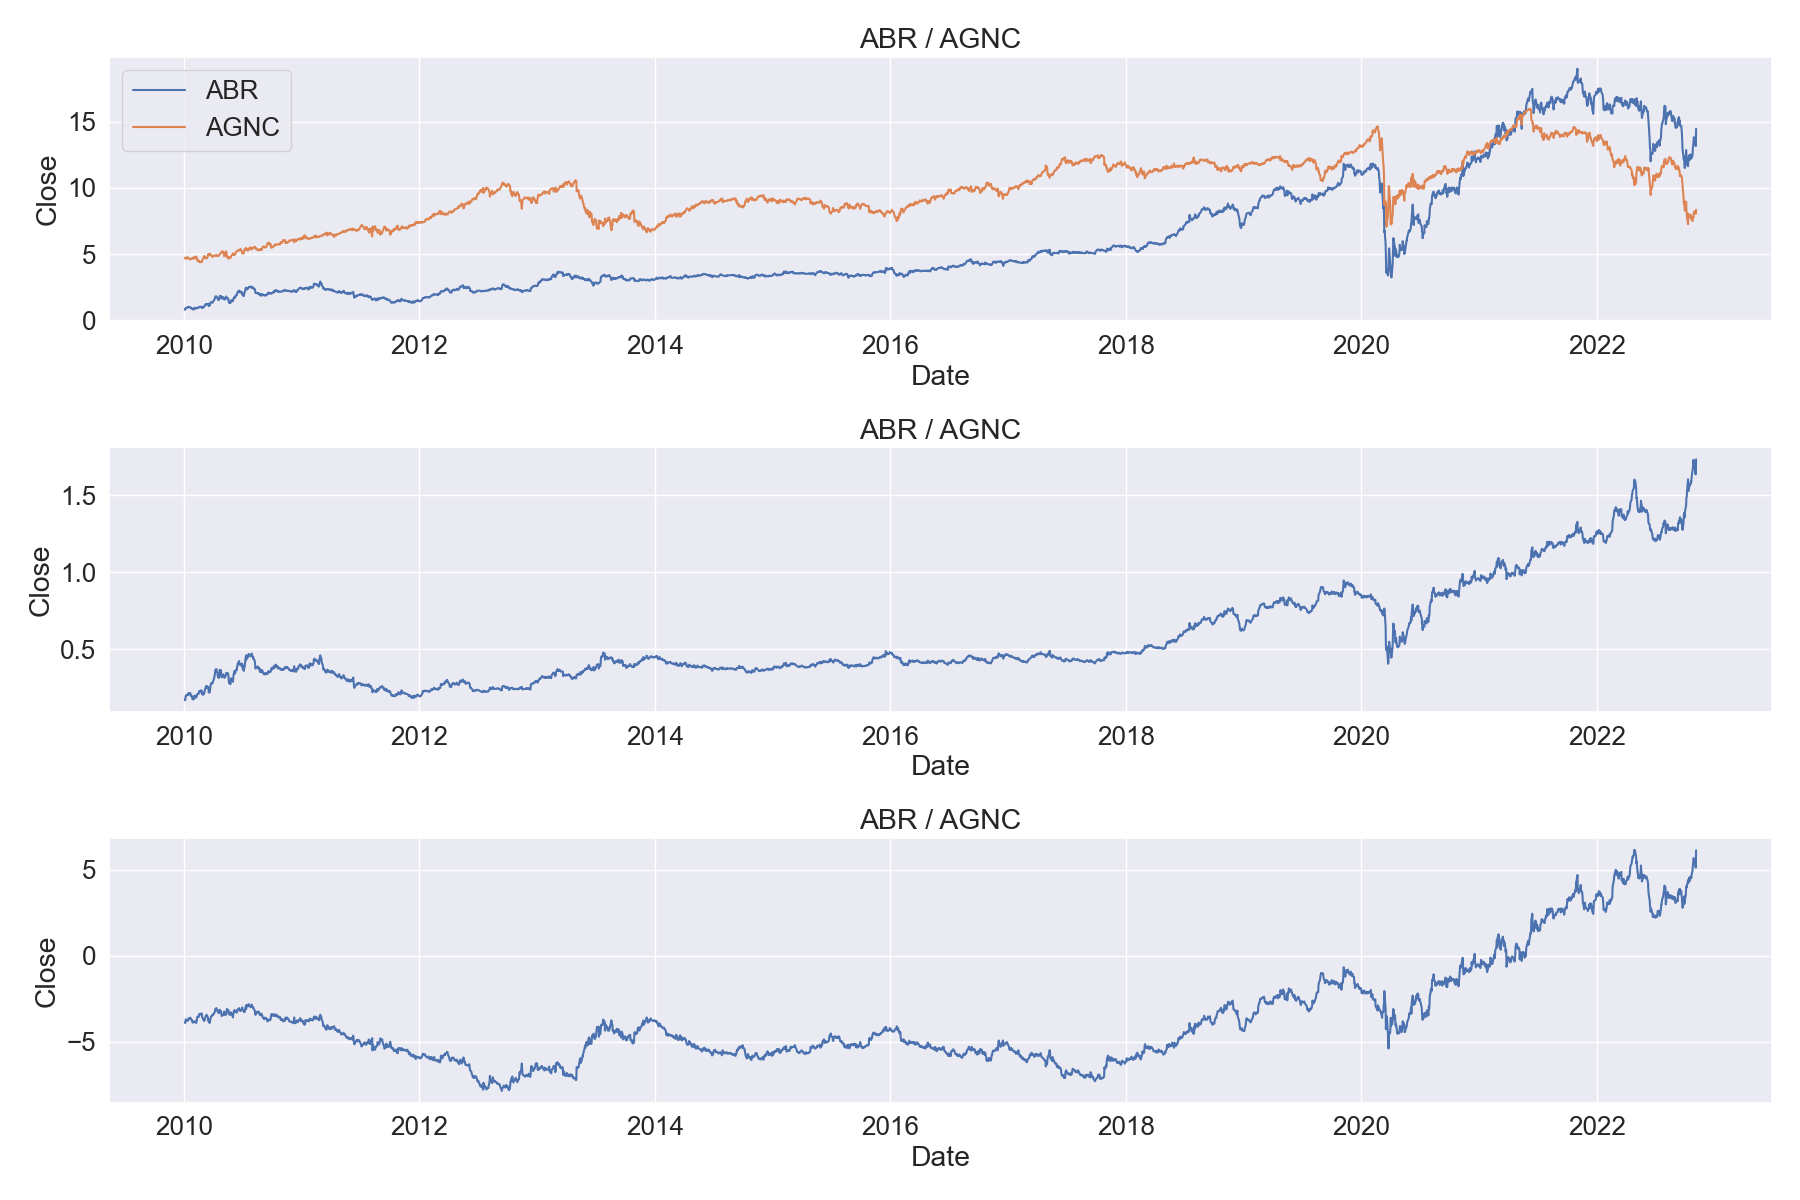

In [3]:
pair("ABR", "AGNC", "LONG position ABR P/E ratio=6.41, dividend: 0.119, Gross profit: 615206", 
"SHORT position AGNC P/E ratio=None, dividend: 0.186, Gross Profit: 837000");

Long BETA: 0.71
Short BETA: 2.6
LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000
SHORT position APPS P/E ratio=41.95, dividend: None, Gross profit: 347110


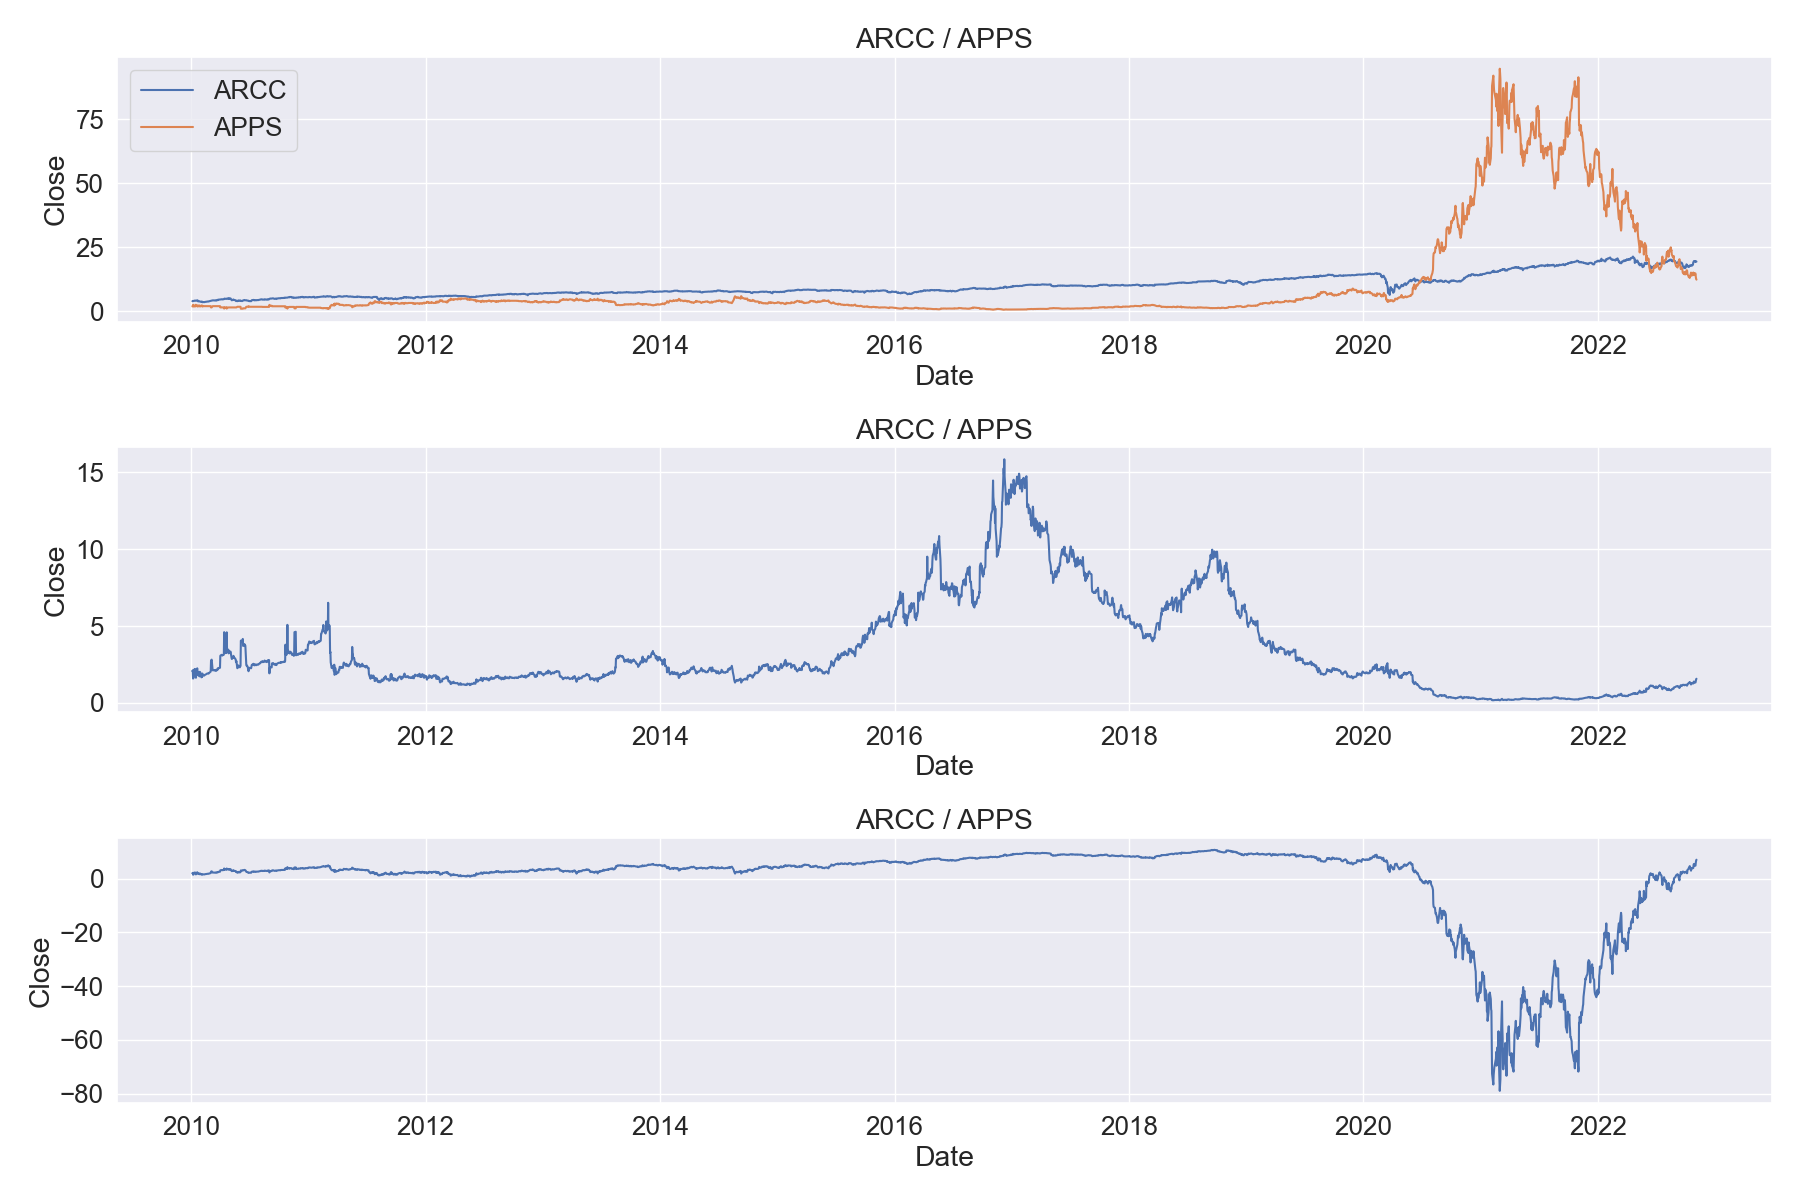

In [11]:
pair("ARCC", "APPS", "LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000",
     "SHORT position APPS P/E ratio=41.95, dividend: None, Gross profit: 347110");

Long BETA: 0.71
Short BETA: 0.53
LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000
SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657


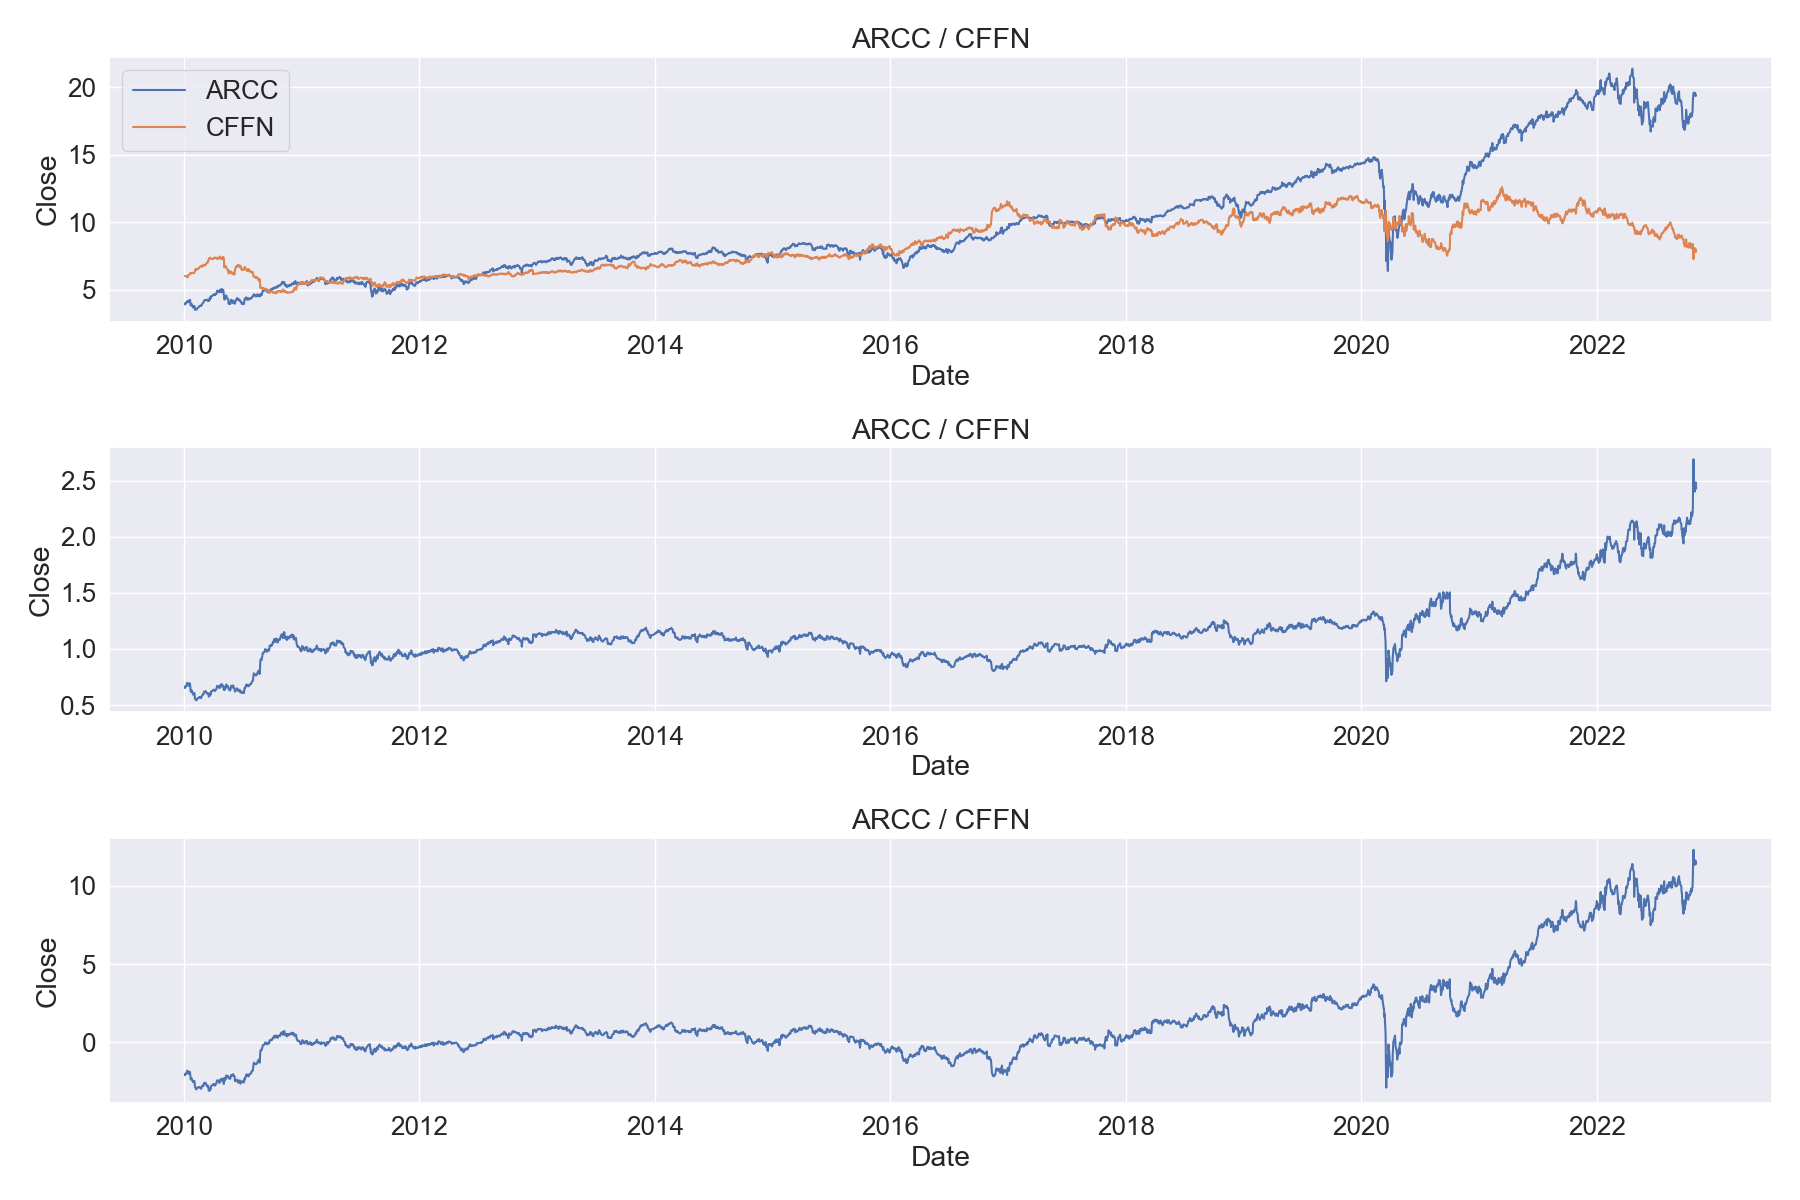

In [12]:
pair("ARCC", "CFFN", "LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000",
     "SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657");

Long BETA: 0.71
Short BETA: 1.04
LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000
SHORT position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013


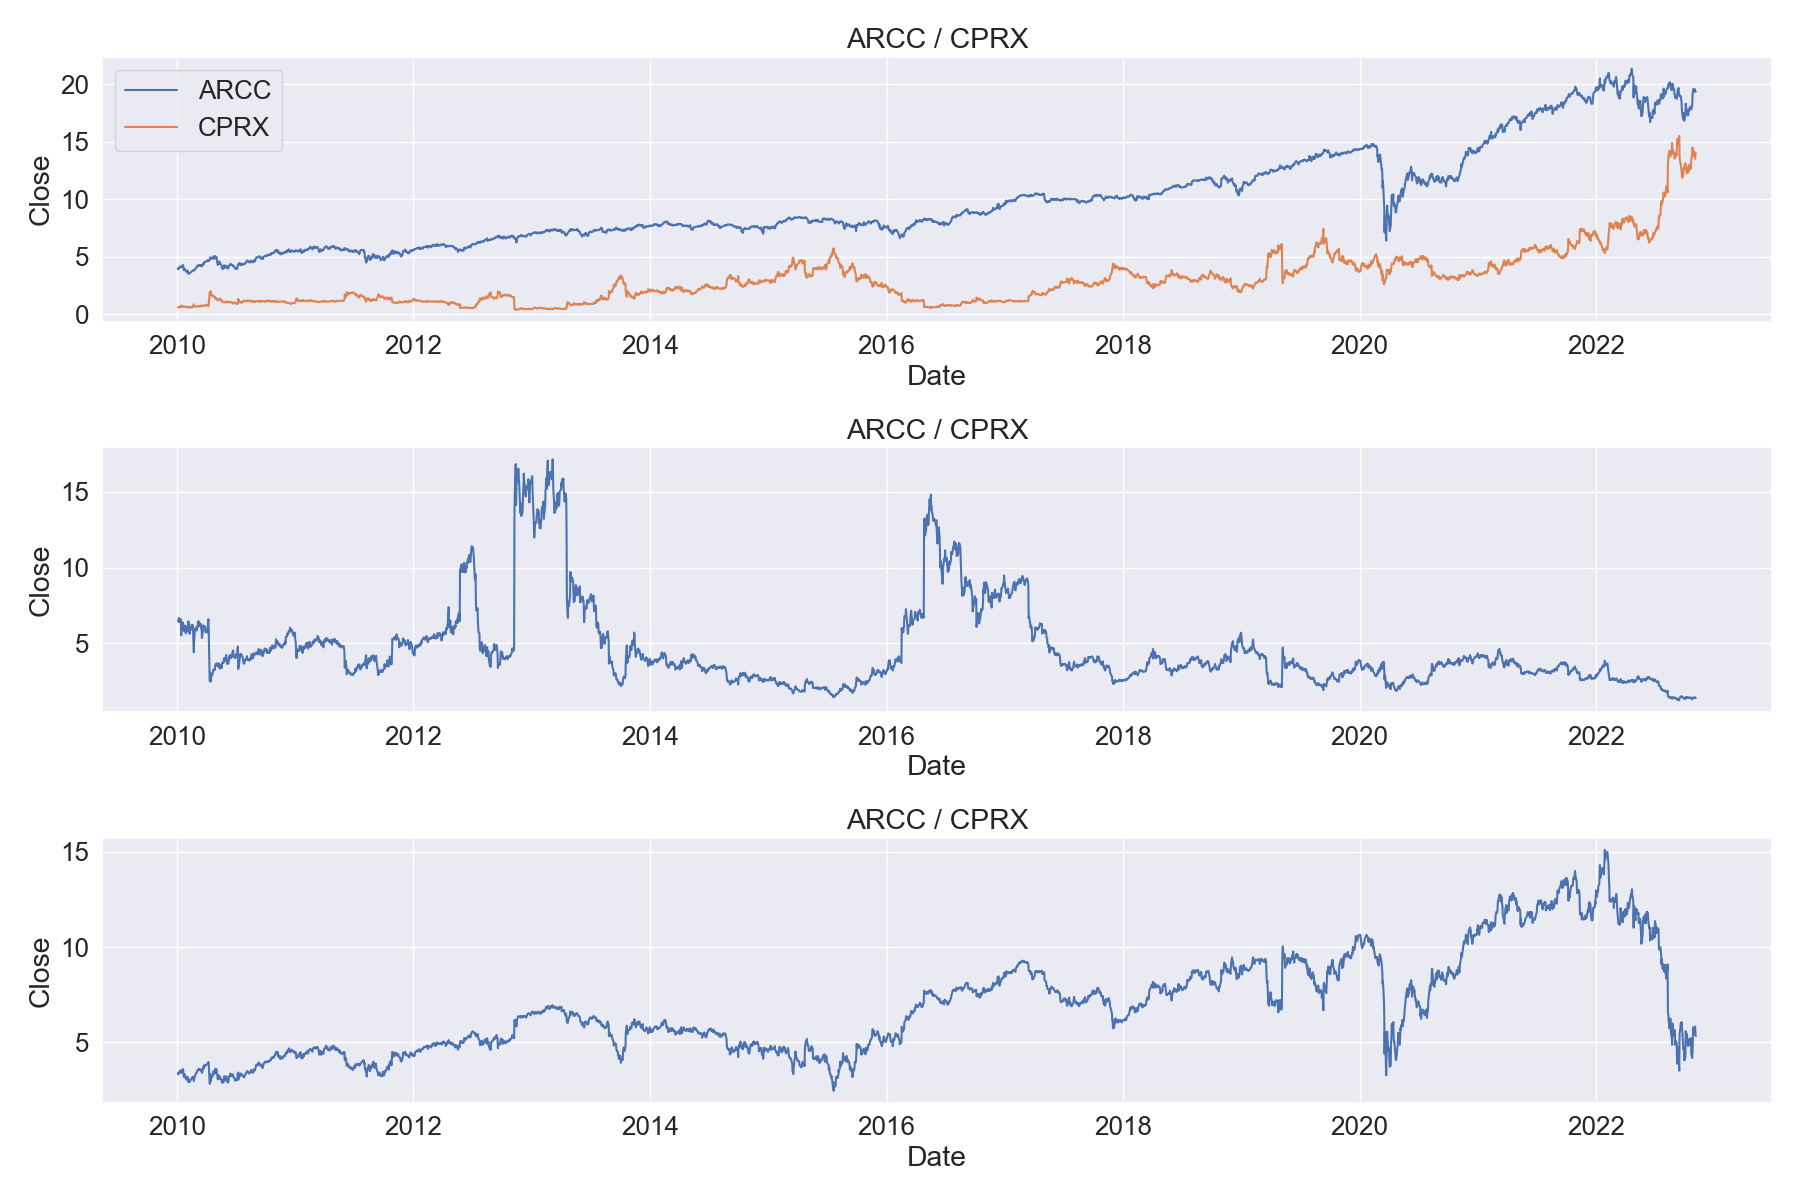

In [14]:
pair("ARCC", "CPRX", "LONG position ARCC P/E ratio=8.65, dividend: 0.09, Gross Profit: 1820000",
     "SHORT position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013");

Long BETA: 1.01
Short BETA: 0.53
LONG position AIV P/E ratio=4.66, dividend: None, Gross profit: 103196
SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657


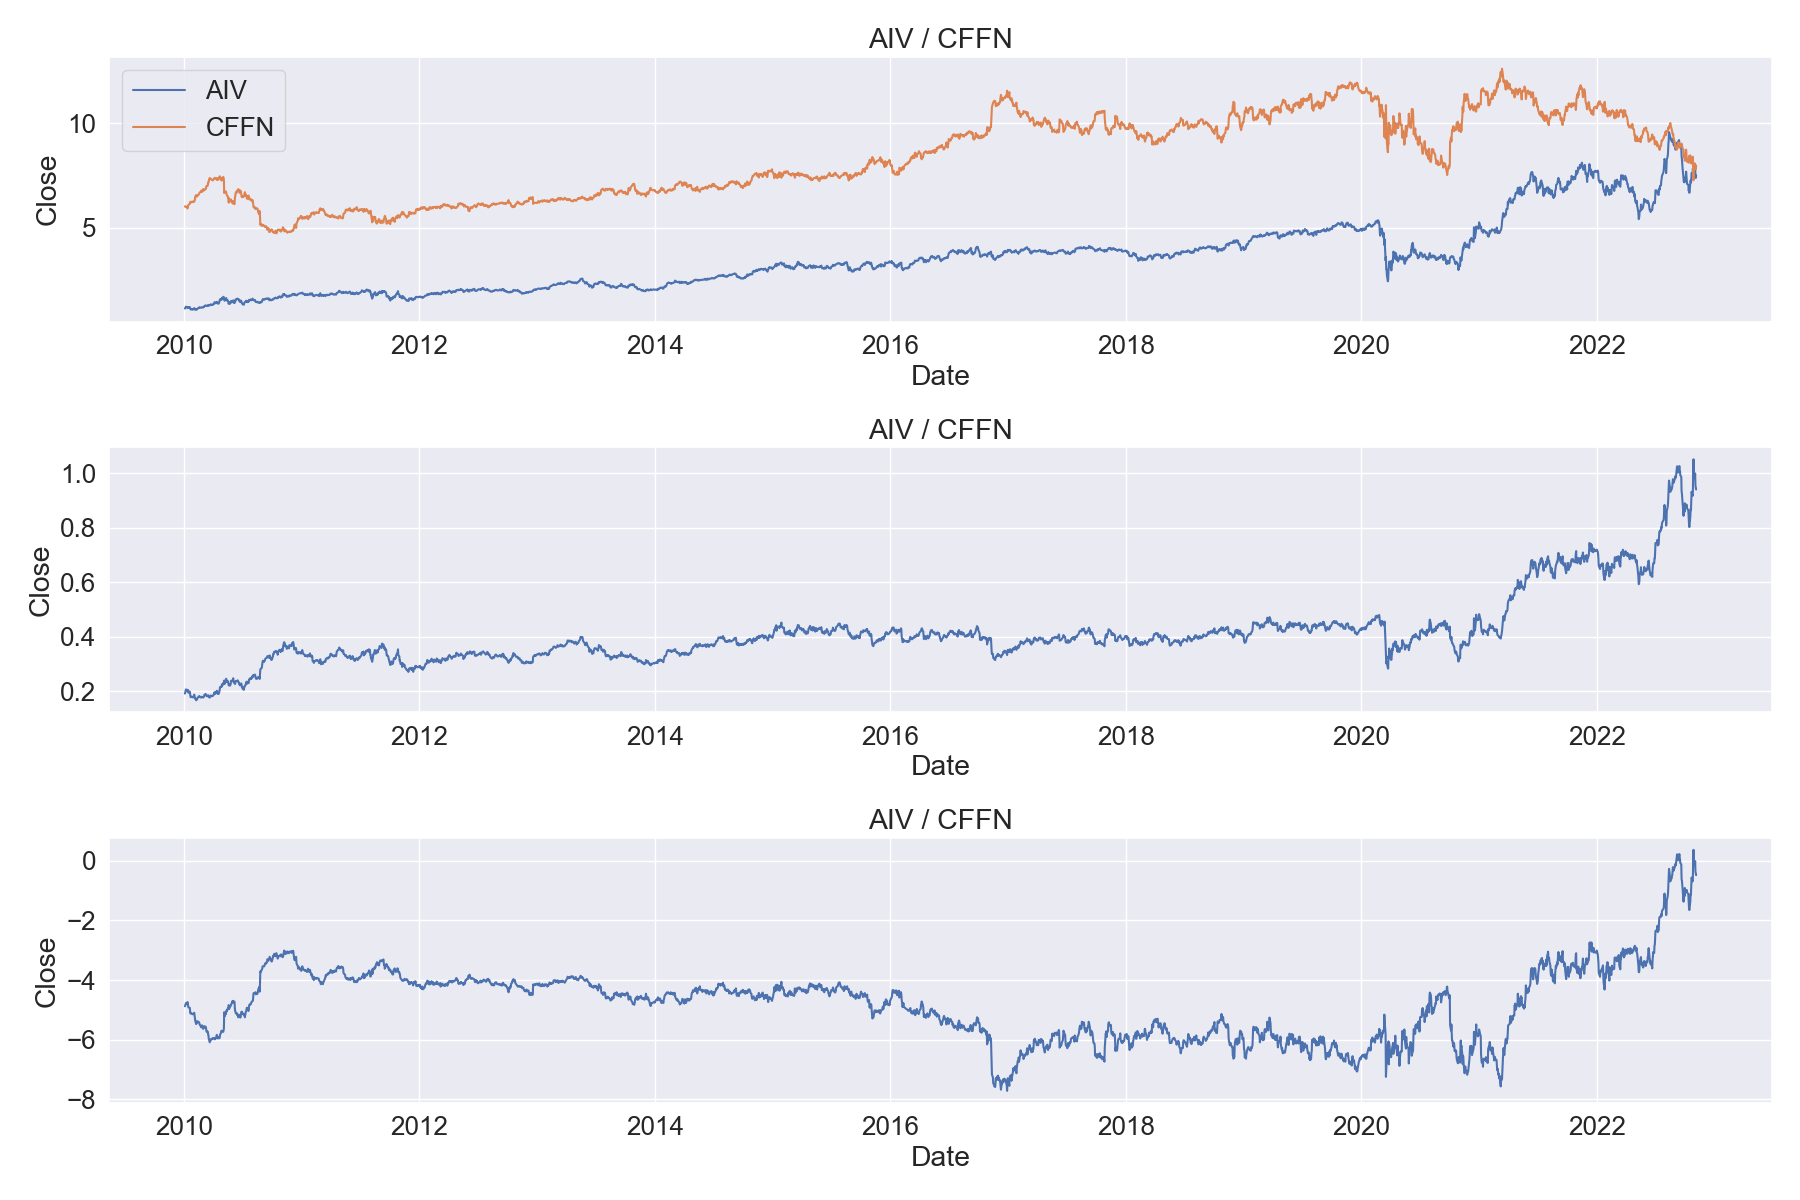

In [16]:
pair("AIV", "CFFN", "LONG position AIV P/E ratio=4.66, dividend: None, Gross profit: 103196",
     "SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657");

Long BETA: 0.94
Short BETA: 0.53
LONG position BDN P/E ratio=37.94, dividend: 0.11, Gross Profit: 269536
SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657


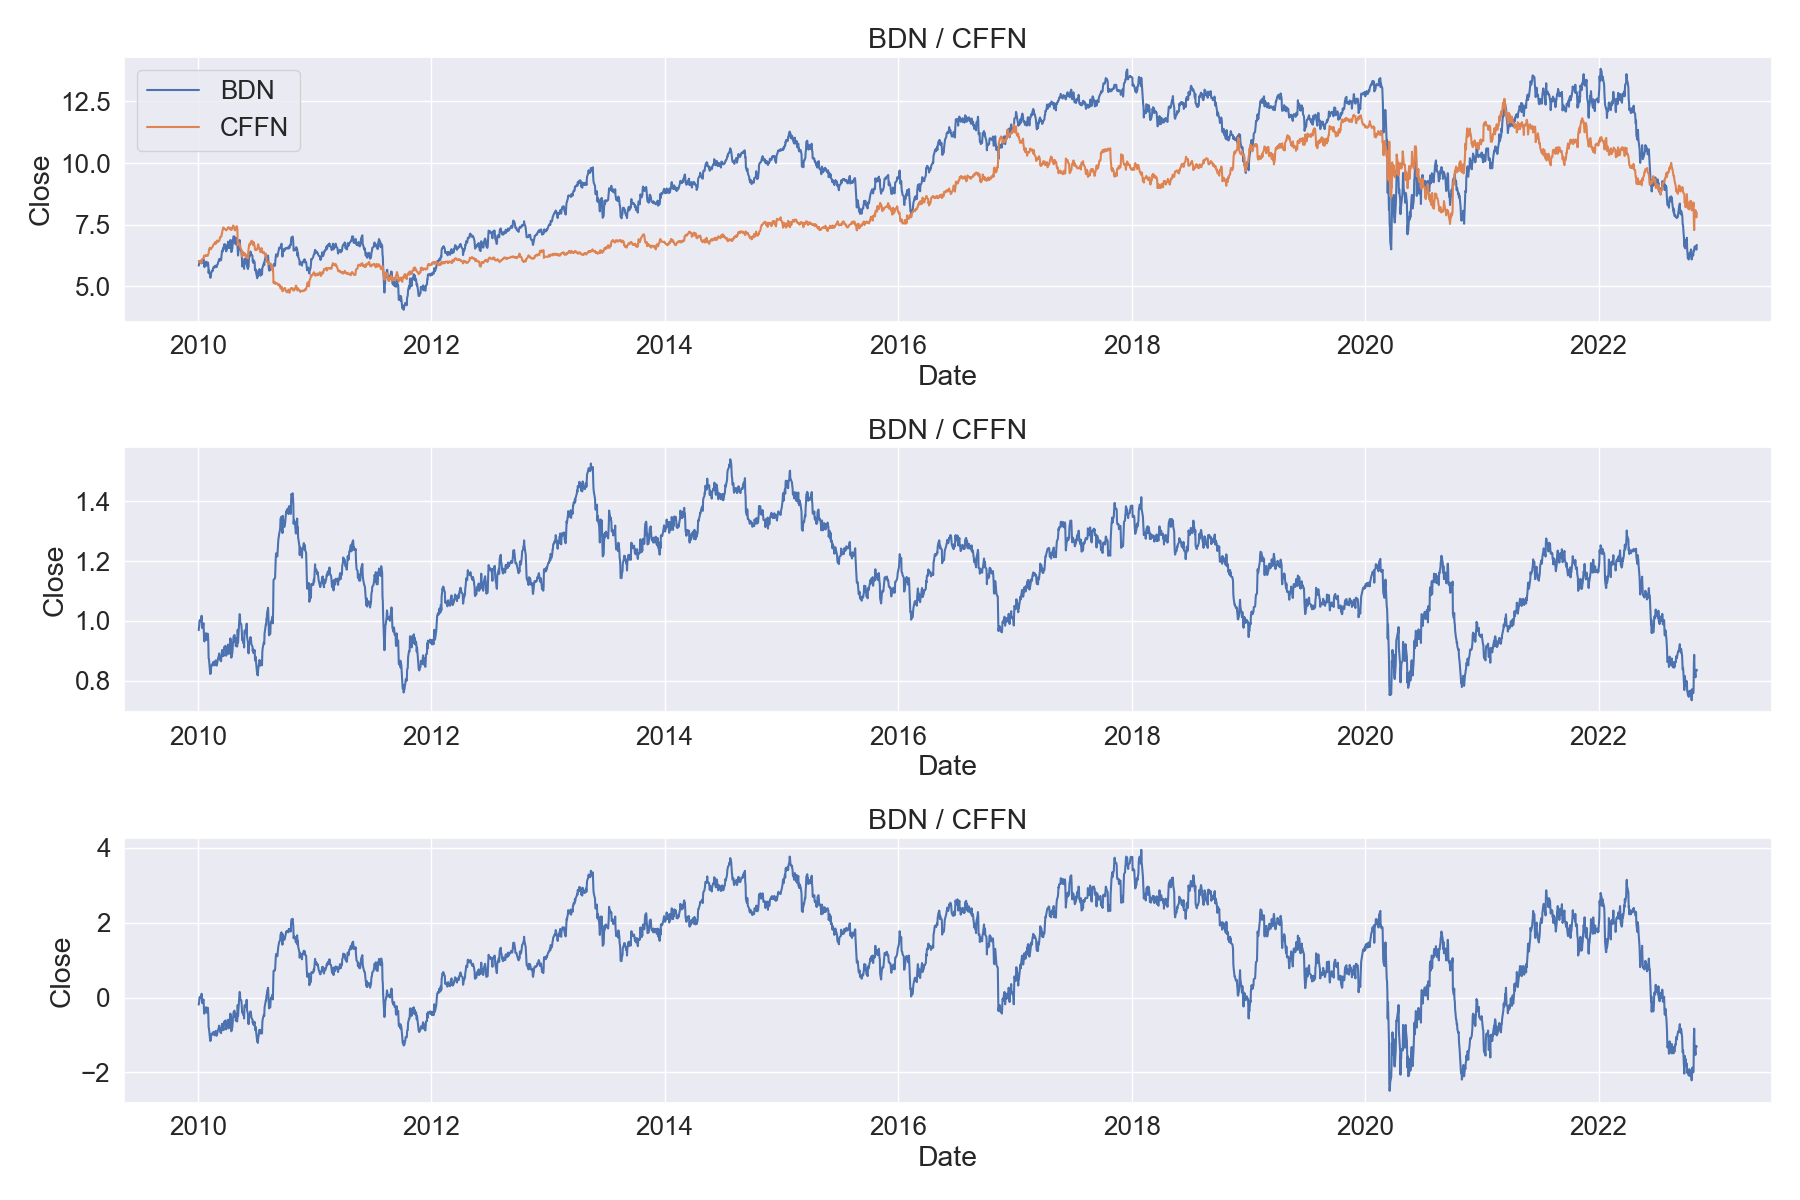

In [19]:
pair("BDN", "CFFN", "LONG position BDN P/E ratio=37.94, dividend: 0.11, Gross Profit: 269536",
     "SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross Profit: 210657");

Long BETA: 0.94
Short BETA: 1.41
LONG position BDN P/E ratio=37.94, dividend: 0.11, Gross Profit: 269536
SHORT position DRH P/E ratio=38.12, dividend: 0.013, Gross Profit: 105428


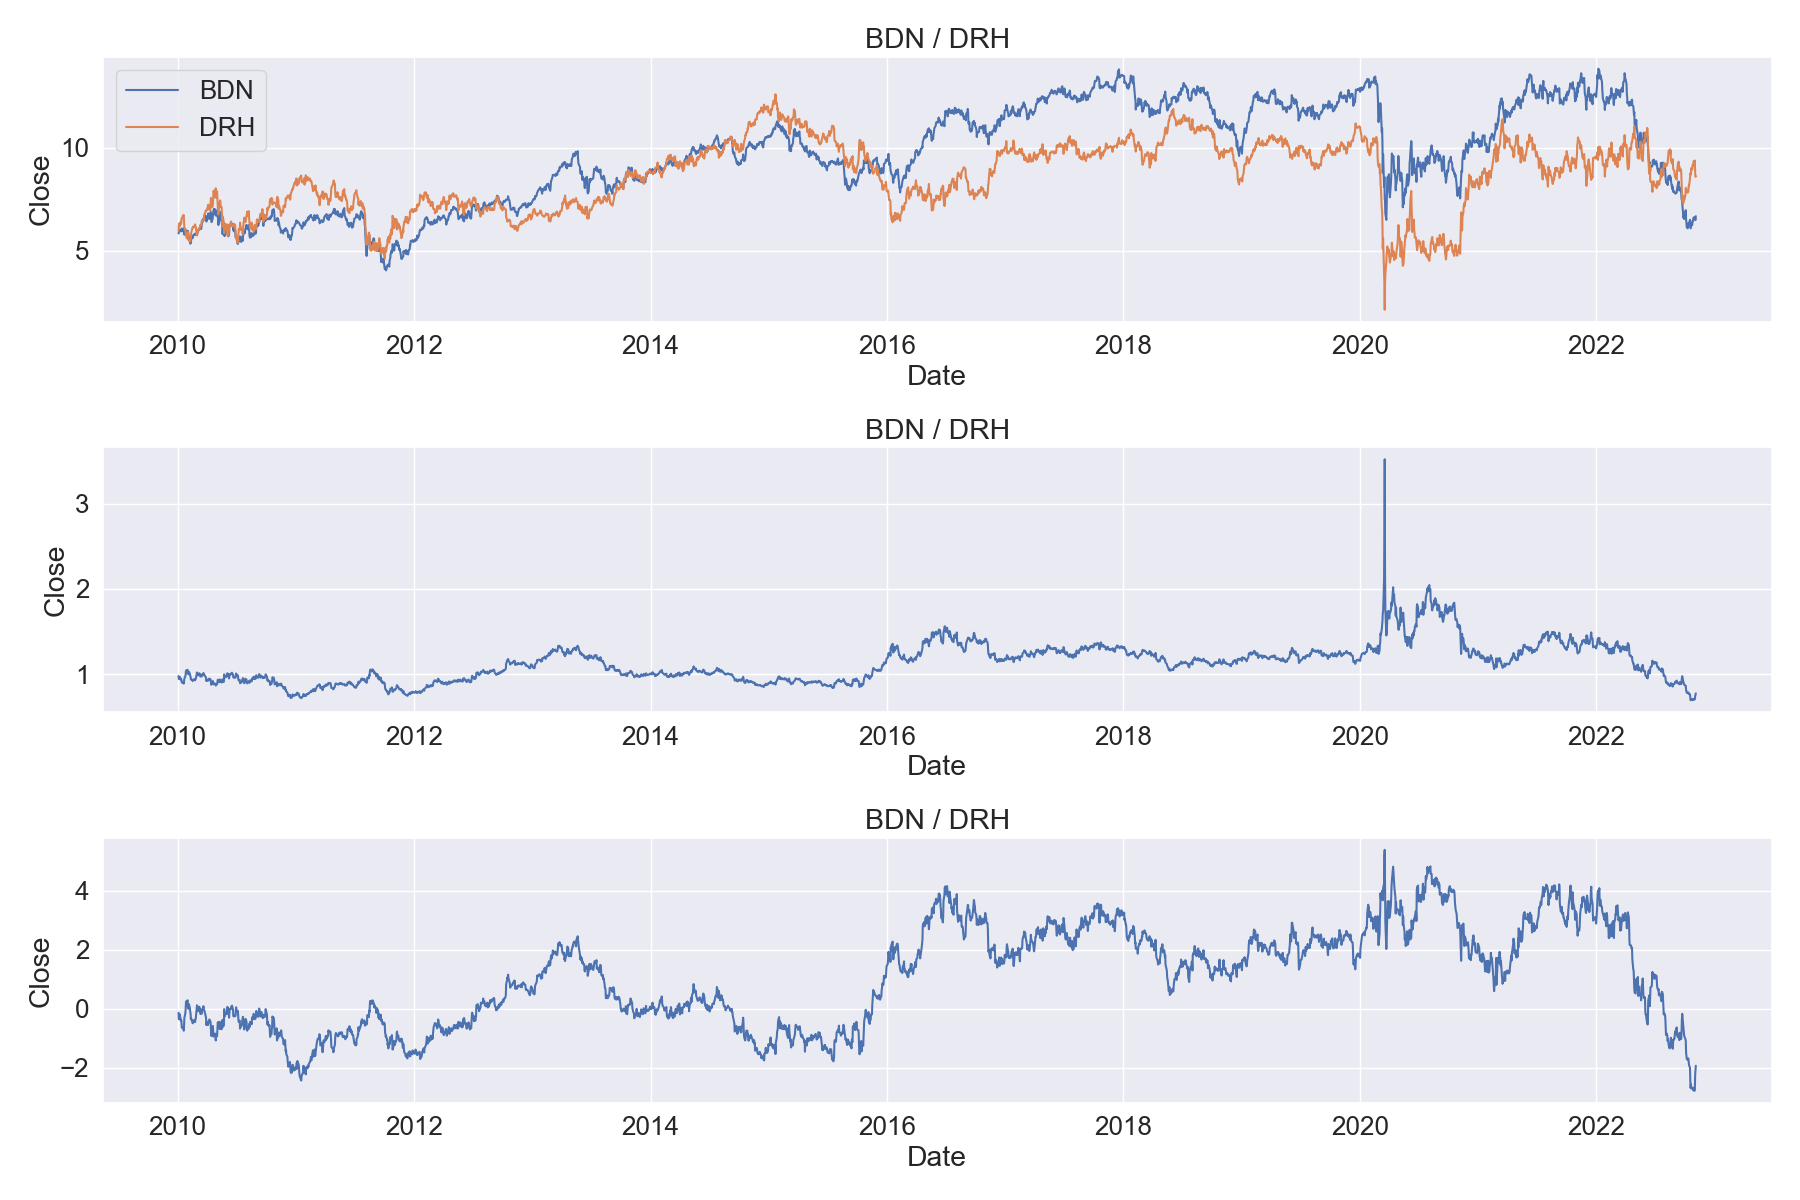

In [20]:
pair("BDN", "DRH", "LONG position BDN P/E ratio=37.94, dividend: 0.11, Gross Profit: 269536",
     "SHORT position DRH P/E ratio=38.12, dividend: 0.013, Gross Profit: 105428");

C:\Users\pauli\AppData\Local\Temp\ipykernel_3988\3831597750.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  chart = fig, axes = plt.subplots(3, figsize=(18, 12))


Long BETA: 1.16
Short BETA: 0.53
LONG position CIM P/E ratio=9.8, dividend: 0.156, Gross Profit: 1057000
SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross profit: 210657


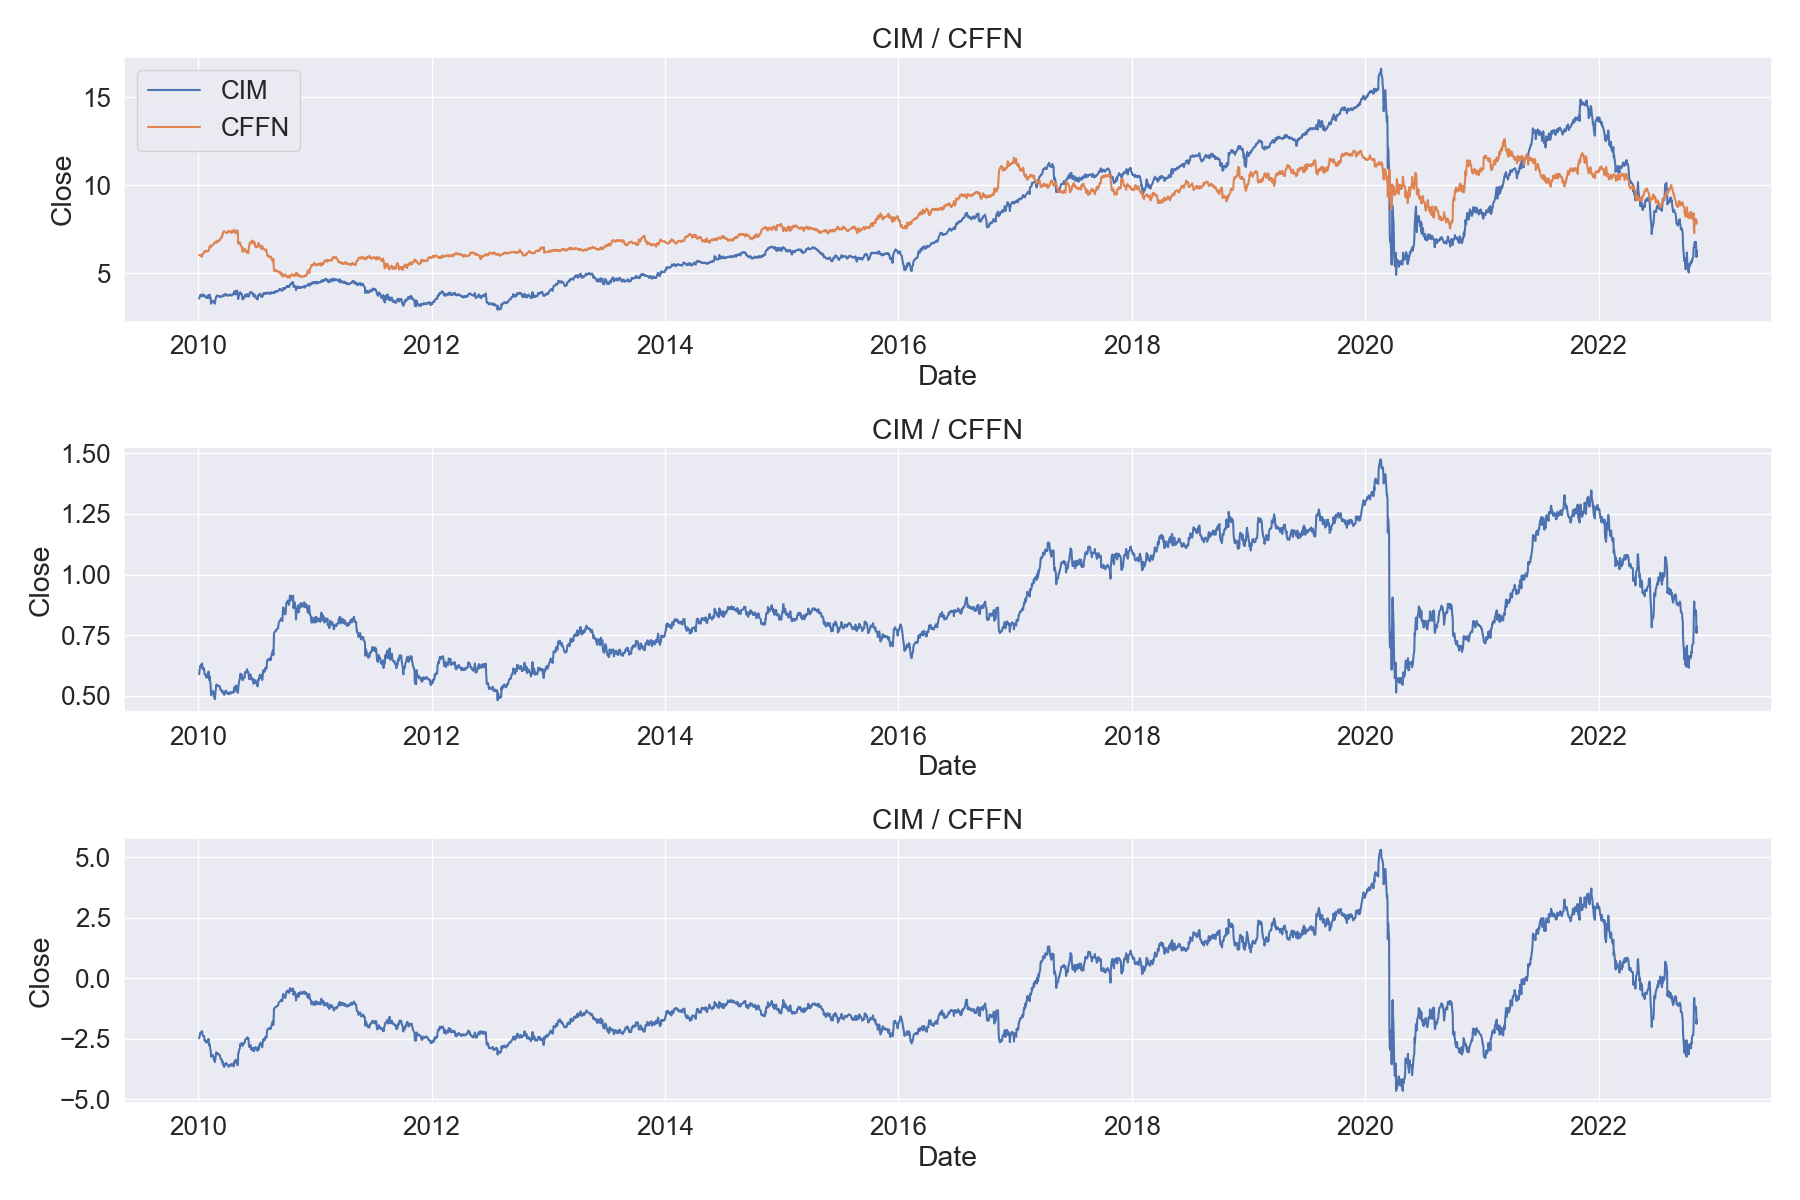

In [23]:
pair("CIM", "CFFN", "LONG position CIM P/E ratio=9.8, dividend: 0.156, Gross Profit: 1057000",
     "SHORT position CFFN P/E ratio=13.69, dividend: 0.041, Gross profit: 210657");

Long BETA: 1.04
Short BETA: 1.01
LONG position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013
SHORT position AIV P/E ratio=4.66, dividend: None, Gross profit: 103196


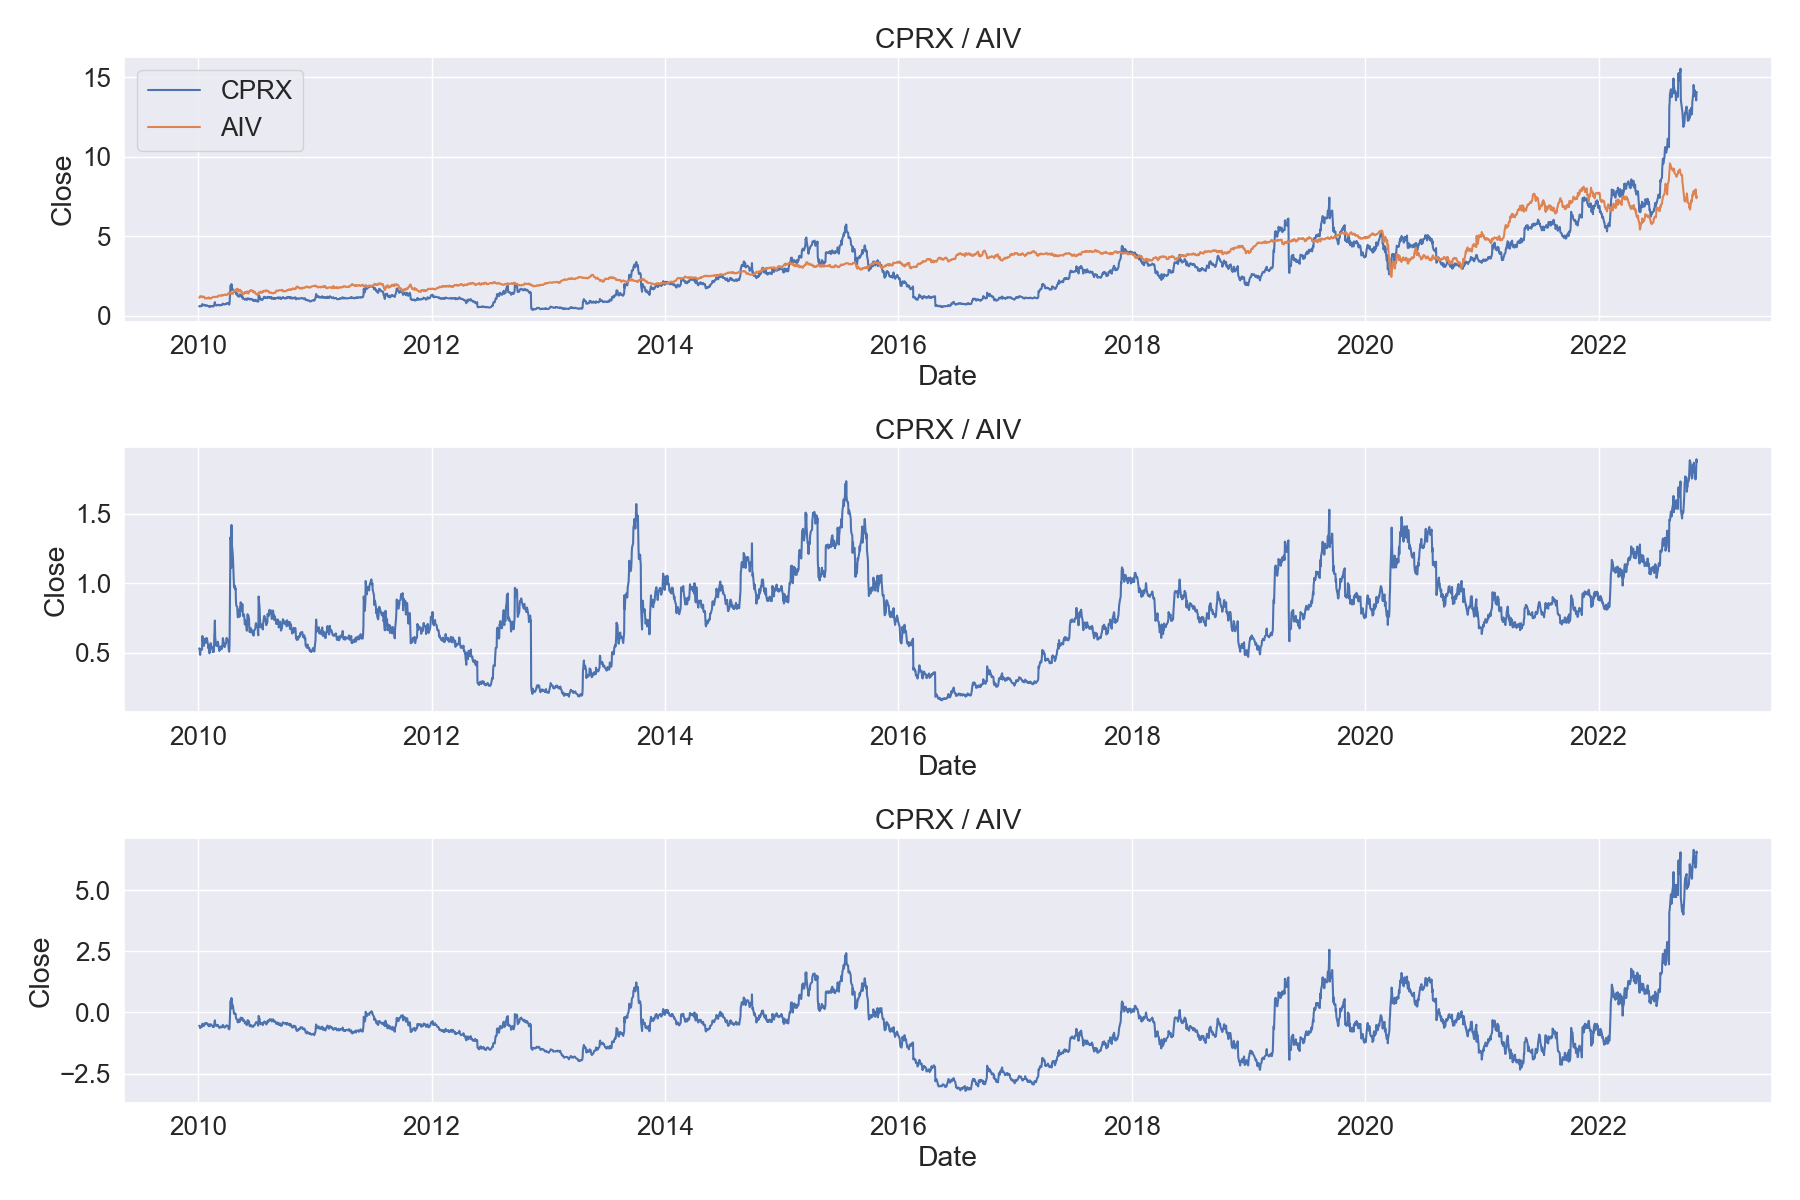

In [24]:
pair("CPRX", "AIV", "LONG position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013",
     "SHORT position AIV P/E ratio=4.66, dividend: None, Gross profit: 103196");

Long BETA: 1.04
Short BETA: 1.72
LONG position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013
SHORT position AMKR P/E ratio=7.12, dividend: 0.01, Gross profit: 1225554


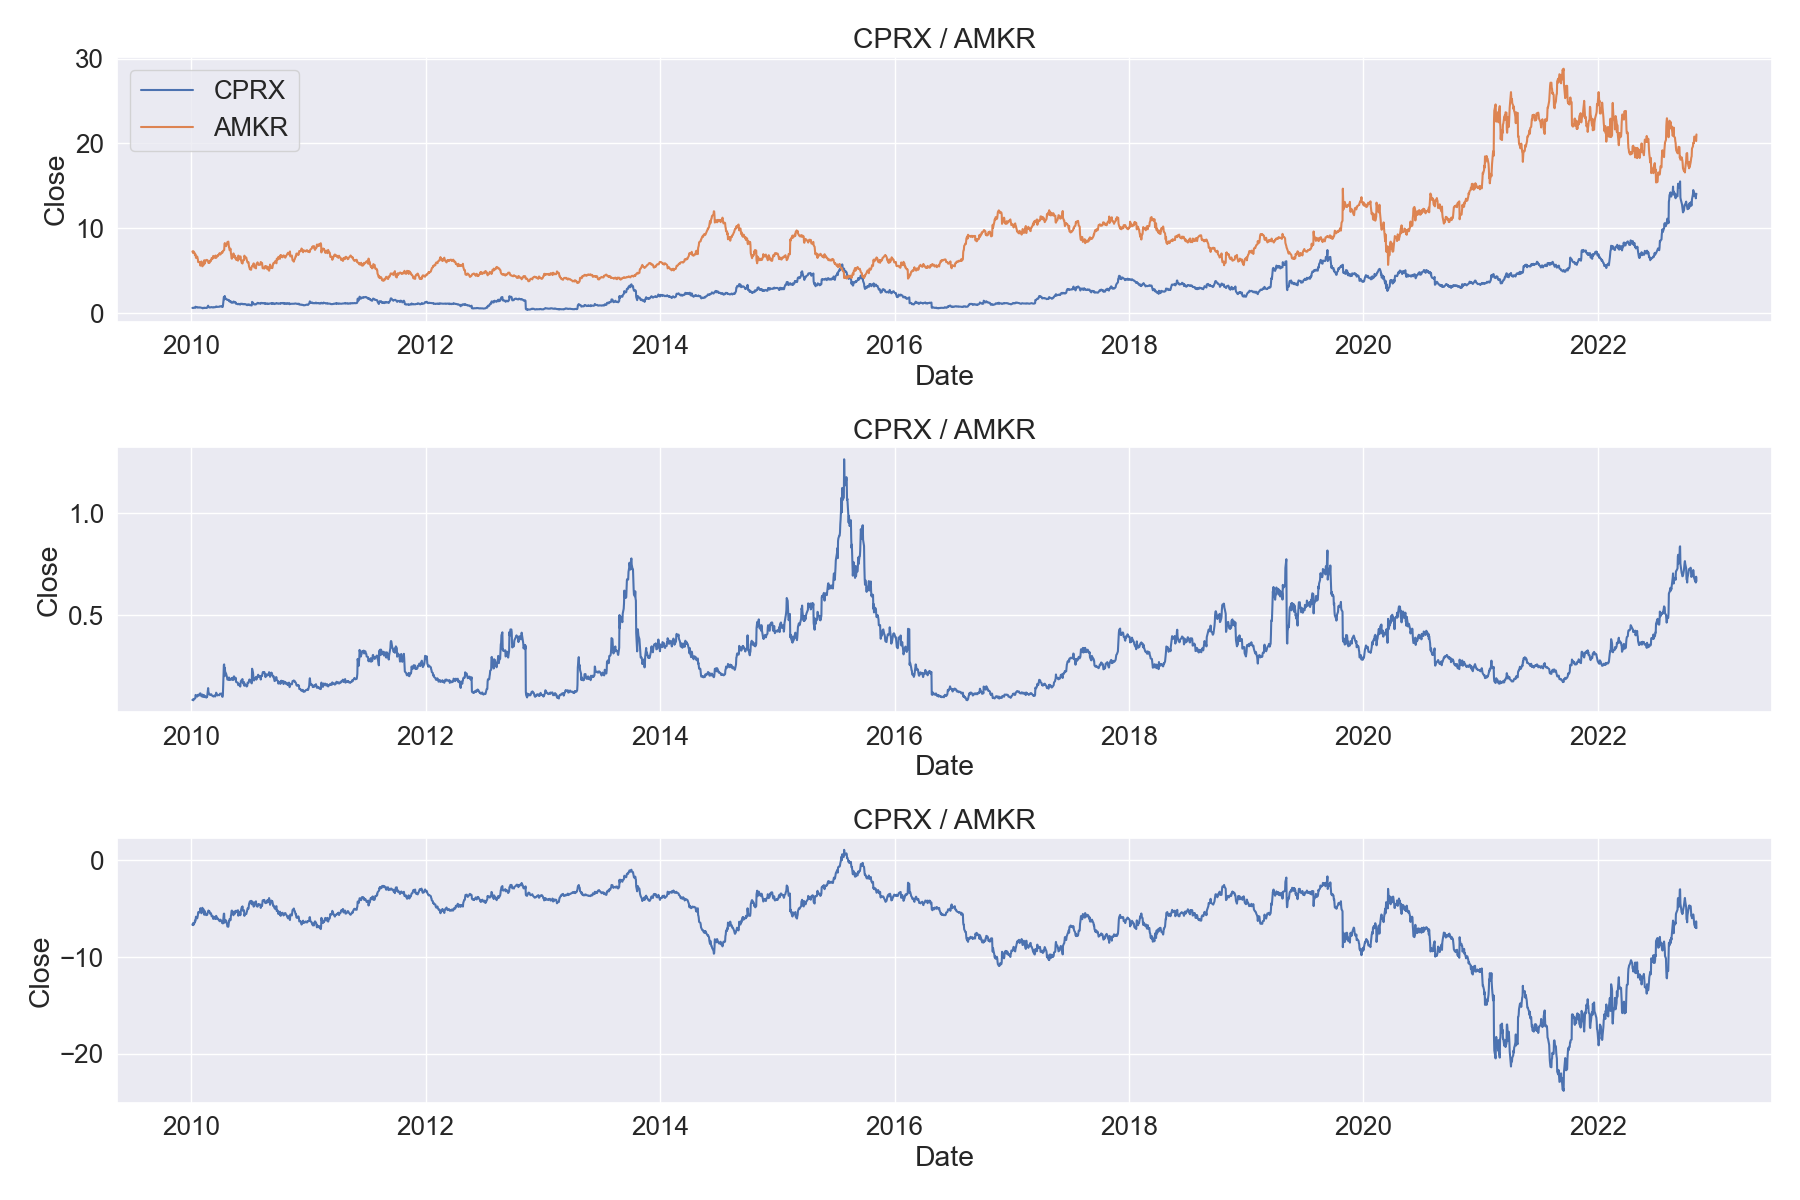

In [25]:
pair("CPRX", "AMKR", "LONG position CPRX P/E ratio=26.85, dividend: None, Gross Profit: 102013",
     "SHORT position AMKR P/E ratio=7.12, dividend: 0.01, Gross profit: 1225554");

Long BETA: 1.09
Short BETA: 0.79
LONG position CRK P/E ratio=14.68, dividend: None, Gross Profit: 1568061
SHORT position CNX P/E ratio=None, dividend: None, Gross profit: 1866027


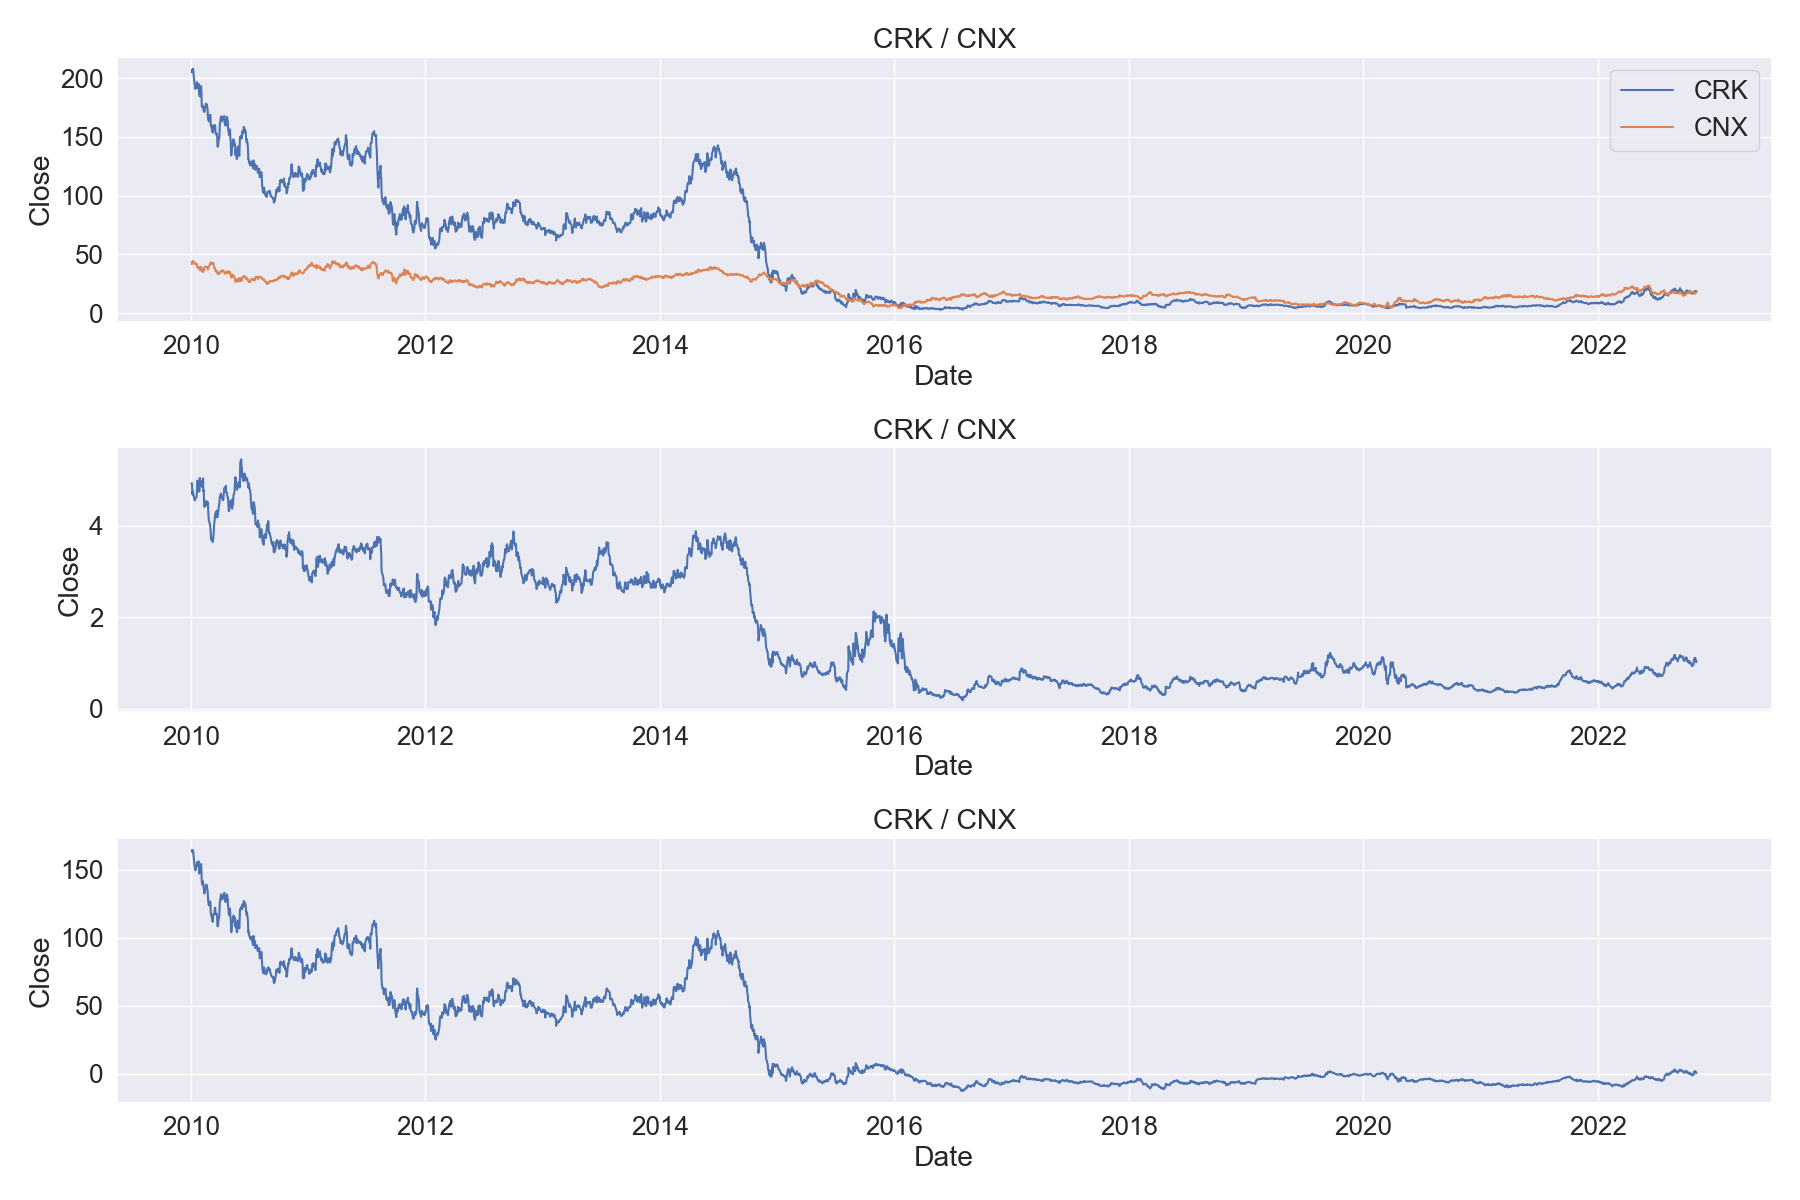

In [26]:
pair("CRK", "CNX", "LONG position CRK P/E ratio=14.68, dividend: None, Gross Profit: 1568061",
     "SHORT position CNX P/E ratio=None, dividend: None, Gross profit: 1866027");

Long BETA: 1.6
Short BETA: 0.75
LONG position AXL P/E ratio=None, dividend: None, Gross profit: 759200
SHORT position CXW P/E ratio=13.53, dividend: None, Gross Profit: 527985


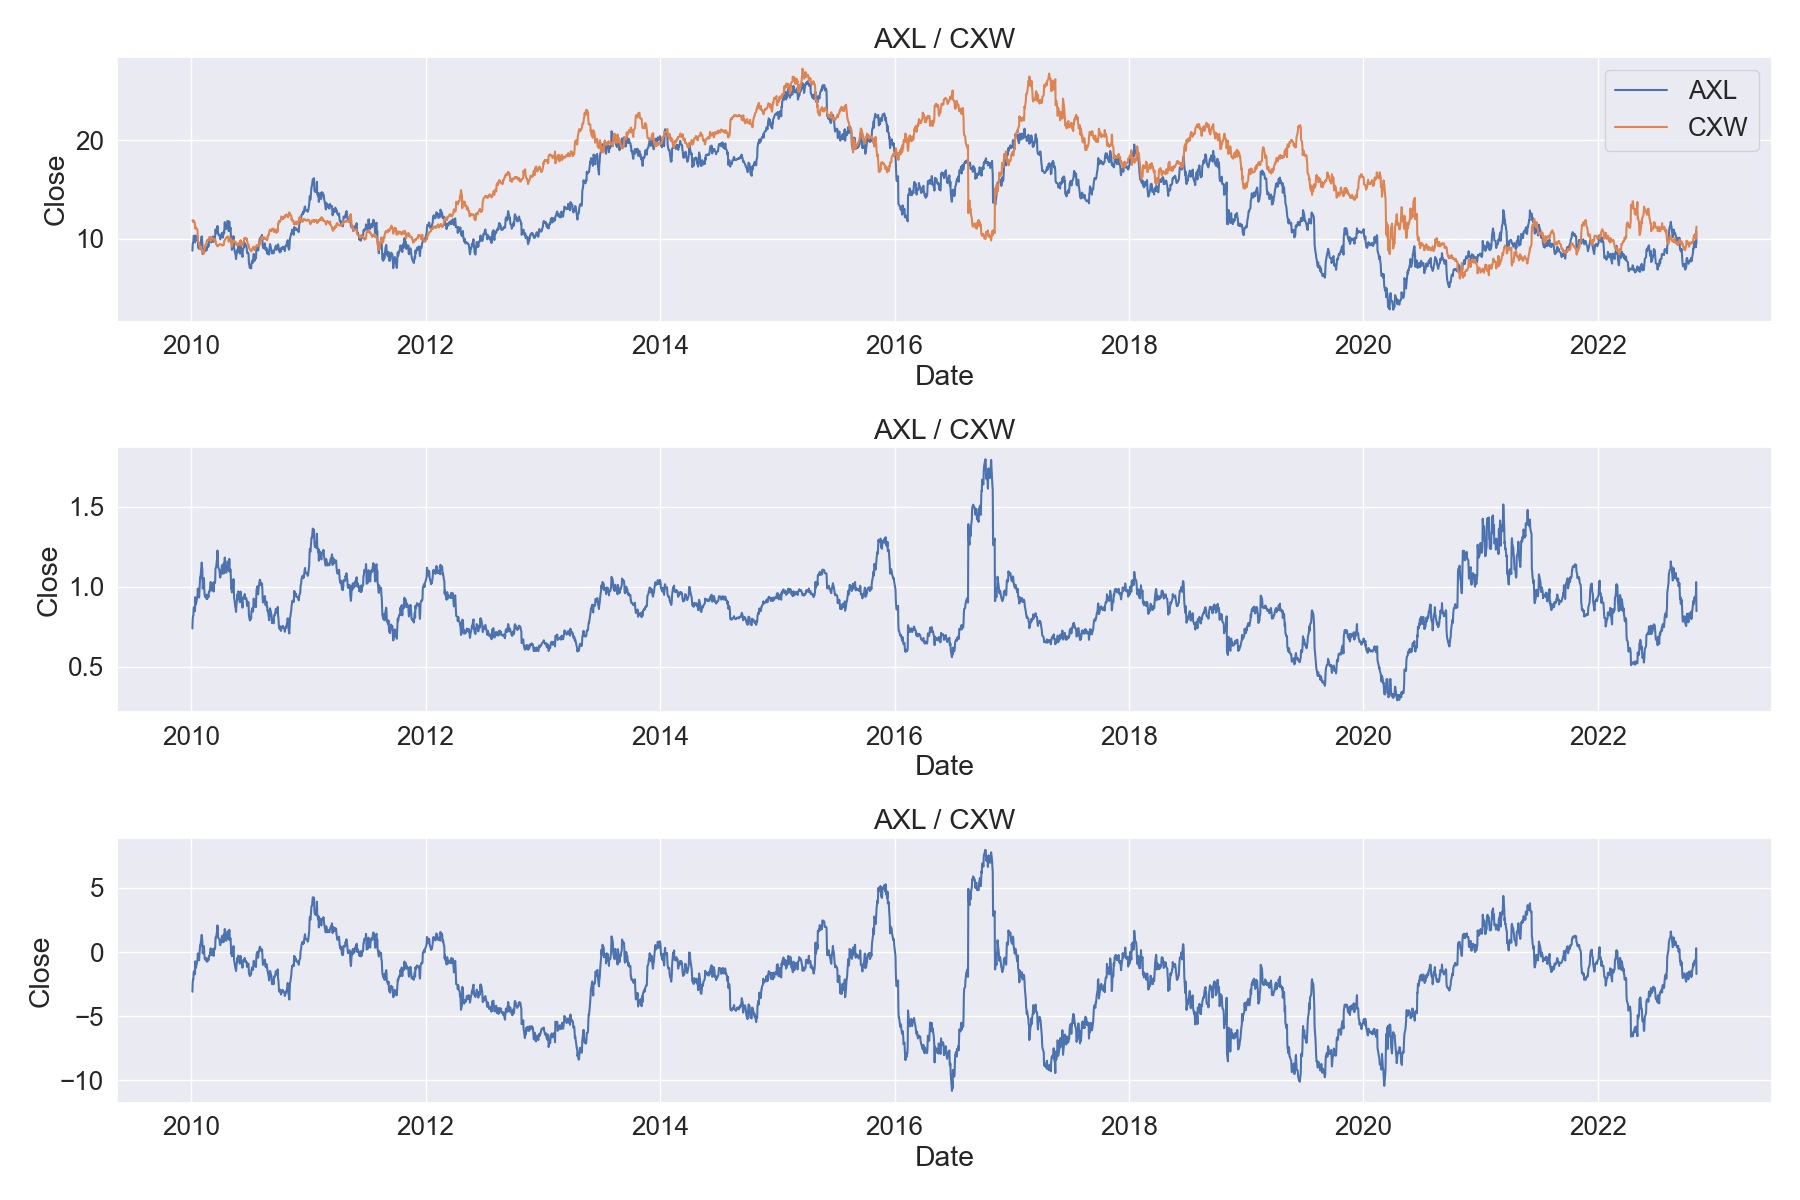

In [27]:
pair("AXL", "CXW", "LONG position AXL P/E ratio=None, dividend: None, Gross profit: 759200",
     "SHORT position CXW P/E ratio=13.53, dividend: None, Gross Profit: 527985");

Long BETA: 0.87
Short BETA: 1.03
LONG position DEI P/E ratio=35.85, dividend: 0.067, Gross Profit: 611142
SHORT position DENN P/E ratio=6.74, dividend: None, Gross Profit: 166310


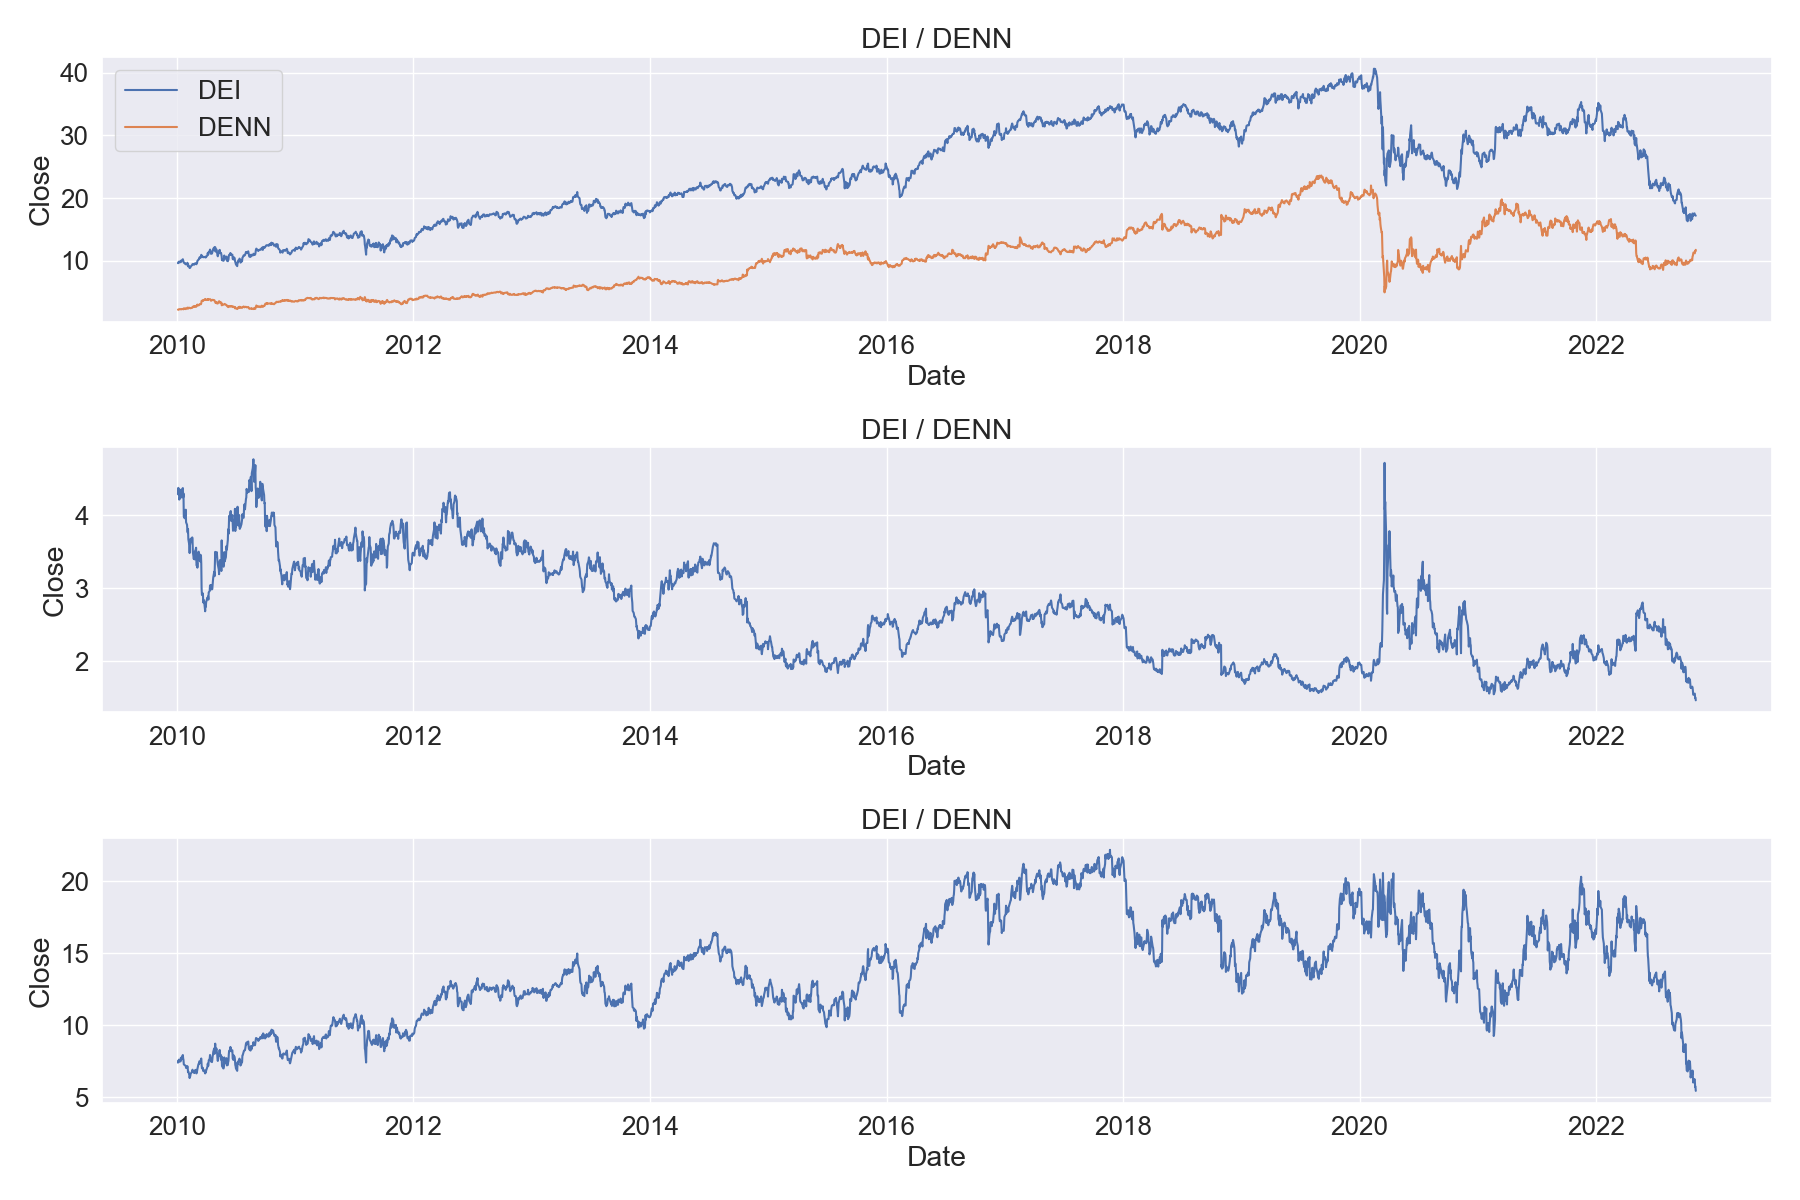

In [29]:
pair("DEI", "DENN", "LONG position DEI P/E ratio=35.85, dividend: 0.067, Gross Profit: 611142",
     "SHORT position DENN P/E ratio=6.74, dividend: None, Gross Profit: 166310");